<a href="https://colab.research.google.com/github/nbnbila/drowsiness-detection/blob/main/drowsiness_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Drowsiness Detection using Machine Learning

In [1]:
import tensorflow
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dropout,Input,Flatten,Dense,MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import pandas as pd
import os
import cv2
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten, Conv2D, MaxPooling2D, Dropout

In [2]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')


Mounted at /content/drive


In [3]:
# Initialize lists to store labels
labels = os.listdir("/content/drive/MyDrive/dataset/drowsiness/train")

In [4]:
labels

['Open', 'no_yawn', 'Closed', 'yawn']

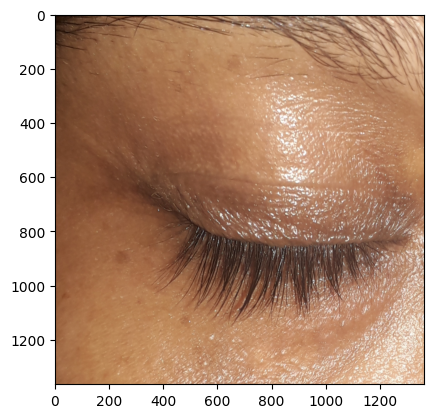

In [5]:
#Display random images
plt.imshow(plt.imread("/content/drive/MyDrive/dataset/drowsiness/train/Closed/_176.jpg"))

In [6]:
# Define an ImageDataGenerator for training data with data augmentation and validation split
train_data_gen = ImageDataGenerator(rescale=1./255, validation_split=0.2)
train_data = train_data_gen.flow_from_directory("/content/drive/MyDrive/dataset/drowsiness/train",
                                               target_size=(80, 80),
                                               batch_size=8,
                                               class_mode='categorical',
                                               subset='training')

Found 2321 images belonging to 4 classes.


In [7]:
# Define an ImageDataGenerator for validation data using the same parameters
validation_data = train_data_gen.flow_from_directory("/content/drive/MyDrive/dataset/drowsiness/train",
                                                     target_size=(80, 80),
                                                     batch_size=8,
                                                     class_mode='categorical',
                                                     subset='validation')

Found 579 images belonging to 4 classes.


In [8]:
# Define an ImageDataGenerator for test data without data augmentation
test_data_gen = ImageDataGenerator(rescale=1./255)
test_data = test_data_gen.flow_from_directory("/content/drive/MyDrive/dataset/drowsiness/train",
                                              target_size=(80, 80),
                                              batch_size=8,
                                              class_mode='categorical')

Found 2900 images belonging to 4 classes.


In [9]:
train_data

In [10]:
#Define the model
model = Sequential([
    Conv2D(256, (3, 3), activation="relu", input_shape=(80, 80, 3)),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation="relu"),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation="relu"),
    MaxPooling2D(2, 2),
    Conv2D(32, (3, 3), activation="relu"),
    MaxPooling2D(2, 2),
    Flatten(),
    Dropout(0.5),
    Dense(64, activation="relu"),
    Dense(4, activation="softmax")
])

model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer="adam")

In [11]:
model.build(input_shape=(80, 80, 3))

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 78, 78, 256)       7168      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 39, 39, 256)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 37, 37, 128)       295040    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 18, 18, 128)      0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 64)        73792     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 8, 8, 64)         0

In [13]:
validation_steps = len(test_data)
validation_steps

363

In [14]:
hist = model.fit(train_data, epochs=20, validation_data = test_data, shuffle=True, validation_steps = len(test_data))

Epoch 1/20
291/291 [==============================] - 840s 3s/step - loss: 0.7837 - accuracy: 0.6282 - val_loss: 0.4794 - val_accuracy: 0.7266
Epoch 2/20
291/291 [==============================] - 285s 981ms/step - loss: 0.4365 - accuracy: 0.7893 - val_loss: 0.3712 - val_accuracy: 0.8200
Epoch 3/20
291/291 [==============================] - 293s 1s/step - loss: 0.3826 - accuracy: 0.8078 - val_loss: 0.3479 - val_accuracy: 0.8248
Epoch 4/20
291/291 [==============================] - 291s 1s/step - loss: 0.3489 - accuracy: 0.8272 - val_loss: 0.4692 - val_accuracy: 0.7841
Epoch 5/20
291/291 [==============================] - 291s 999ms/step - loss: 0.3303 - accuracy: 0.8328 - val_loss: 0.3234 - val_accuracy: 0.8334
Epoch 6/20
291/291 [==============================] - 293s 1s/step - loss: 0.2866 - accuracy: 0.8759 - val_loss: 0.3139 - val_accuracy: 0.8407
Epoch 7/20
291/291 [==============================] - 290s 997ms/step - loss: 0.2680 - accuracy: 0.8742 - val_loss: 0.3352 - val_accurac

In [15]:
model.save("drowiness.h5")

In [16]:
accuracy = hist.history['accuracy']
val_accuracy = hist.history['val_accuracy']
loss = hist.history['loss']
val_loss = hist.history['val_loss']
epochs = range(len(accuracy))

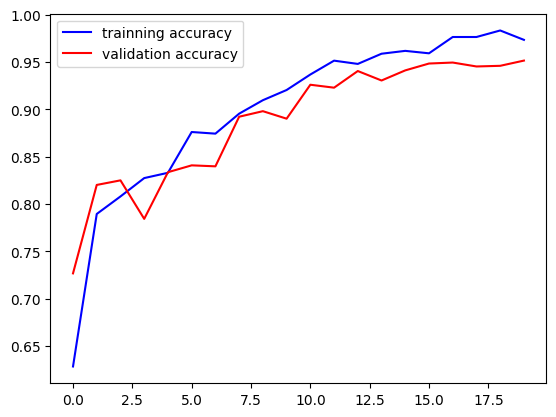

In [17]:
plt.plot(epochs, accuracy, "b", label="trainning accuracy")
plt.plot(epochs, val_accuracy, "r", label="validation accuracy")
plt.legend()
plt.show()

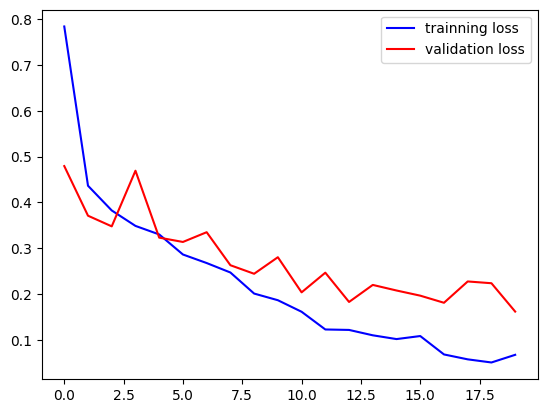

In [18]:
plt.plot(epochs, loss, "b", label="trainning loss")
plt.plot(epochs, val_loss, "r", label="validation loss")
plt.legend()
plt.show()